## Máquinas de soporte vectorial (SVM)

Es un algoritmo de aprendizaje supervisado donde el objetivo es maximizar el margen definido por la distancia entre el hiperplano de separación y los puntos (de los datos de entrenamiento) más cercanas al hiperplano. Estos puntos son denominados _vectores soporte_.

La idea que hay detrás de las SVM de _margen máximo_ consiste en seleccionar el hiperplano separador que está a la misma distancia de los puntos más cercanos de cada clase.

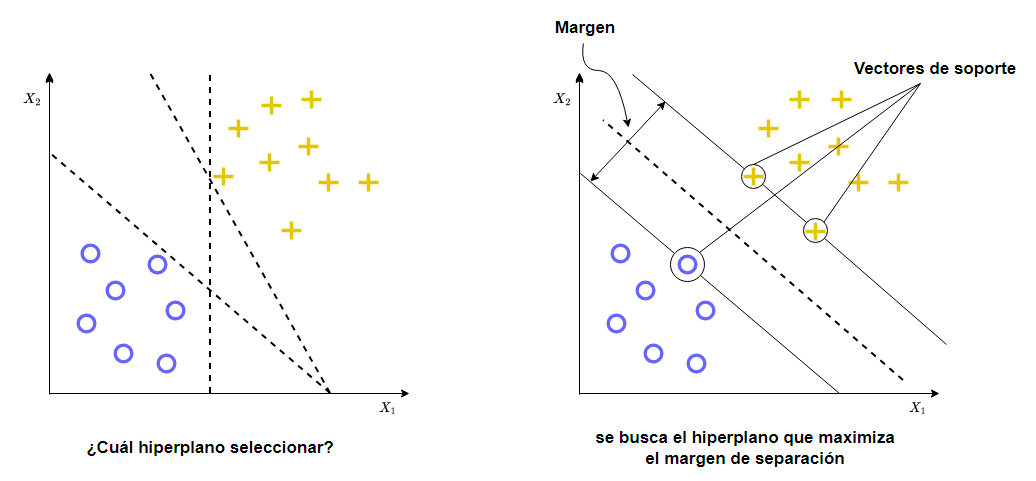

In [1]:
import sys
from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

display(Image(filename='./2_imagenes/SVM_1.png', width=700))

Las SVM tienen en su implementación una variable de holgura _C_ que permite que las restricciones no se cumplan de manera estricta. Esto es necesario en el caso de conjuntos que no son linealmente separables.

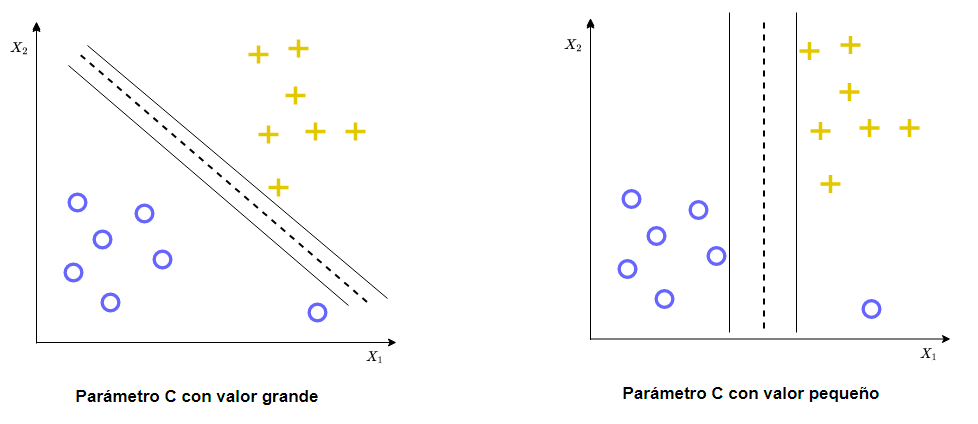

In [2]:
display(Image(filename='./2_imagenes/SVM_2.png', width=700))

Es un modelo muy sensible a la diferencia de escalas de los atributos

A continuación vamos a usar las SVM con algunos datasets guardados en la carpeta `1_datos`

In [3]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from modulos.graficacion import plot_decision_regions

### Dataset Nº 1

In [4]:
# Dataset data1.mat
import scipy.io as sio
archivo_mat = sio.loadmat('1_datos/data1.mat')

X = archivo_mat['X']
y = archivo_mat['y'].flatten()

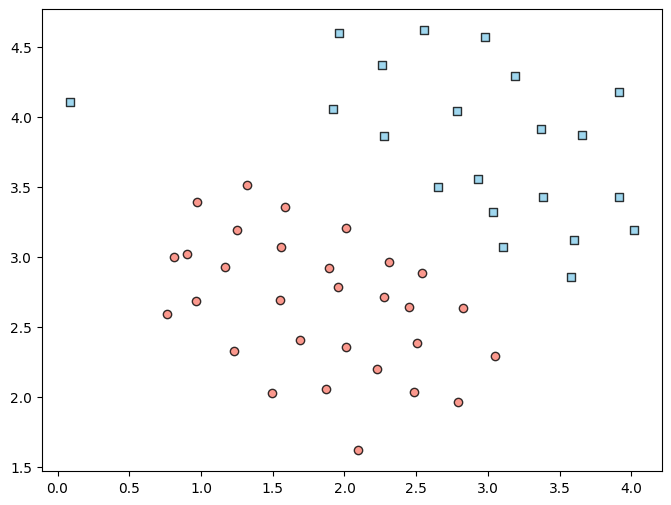

In [5]:
# Visualizamos los datos
markers = ('o', 's', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
plt.show()

Este dataset es linealmente separable. Notar que se tiene un outlier en una de las clases.

Probar con diferentes valores del parámetro C de la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) de scikit-learn y ver qué efecto tiene la presencia del outlier en la región de separación.

In [6]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std=sc.fit_transform(X)

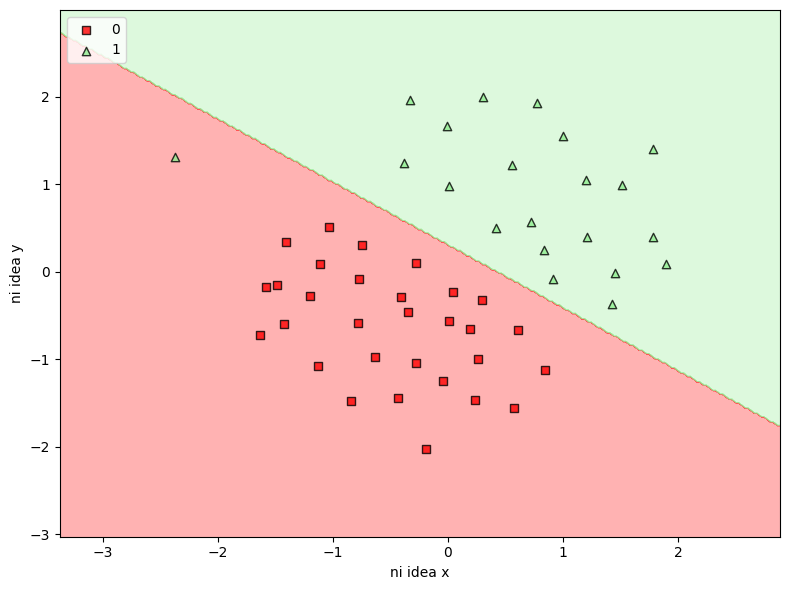

In [7]:
#Entrenamos diferentes SVM y visualizamos el resultado con plot_decision_regions
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions

svm1 = SVC(C=1, kernel='linear')
svm1.fit(X_std, y)

plt.figure(figsize=(8,6))
plot_decision_regions( X_std, y, clasificador=svm1)
plt.xlabel('ni idea x')
plt.ylabel('ni idea y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


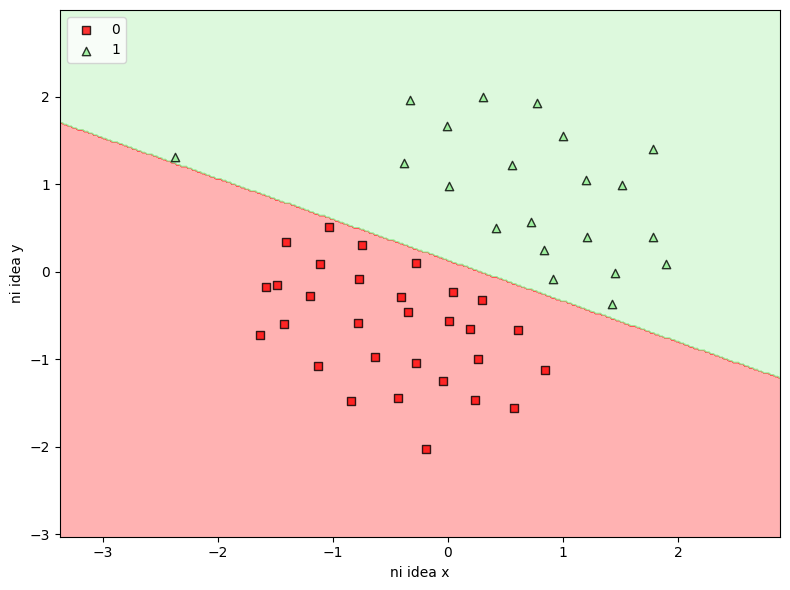

In [8]:
svm2 = SVC(C=16, kernel='linear')
svm2.fit(X_std, y)

plt.figure(figsize=(8,6))
plot_decision_regions( X_std, y, clasificador=svm2)
plt.xlabel('ni idea x')
plt.ylabel('ni idea y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Dataset Nº 2
### SVM con kernel Gaussiano

In [9]:
# Dataset data2.mat
archivo_mat_2 = sio.loadmat('1_datos/data2.mat')
X_2 = archivo_mat_2['X']
y_2 = archivo_mat_2['y'].flatten()
X_2.shape

(863, 2)

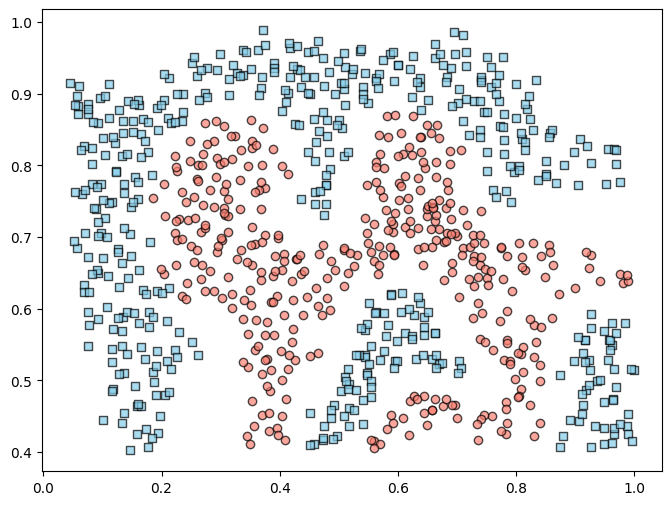

In [10]:
# Visualizamos los datos
markers = ('o', 's', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y_2)):
    plt.scatter(x=X_2[y_2 == cl, 0],
                y=X_2[y_2 == cl, 1],
                alpha=0.7,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

Como verá de la gráfica, los datos no son linealmente separables. Con el kernel Gaussiano, el algoritmo del SVM podrá encontrar la región de decisión capaz de separar los datos correctamente y seguir los contornos del dataset.

In [11]:
#Escalamos los datos

sc = StandardScaler()
X2_std=sc.fit_transform(X_2)

Uno de los _kernels_ más utilizado es el __radial basis function__ (RBF), que se conoce como __kernel Gaussiano__. Vea la documentación de la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) para utilizar este kernel.

Un parámetro adicional al utilizar este kernel es el parámetro **gamma**. Este indica cuánta influencia tiene una sola muestra, haciendo que el límite de decisión se ajuste mucho más a las muestras. **Pruebe con diferentes valores de gamma para ver el efecto del mismo.**

La idea principal detrás del uso de _kernels_ con datos que no son linealmente separables, es crear combinaciones no lineales de las características originales y proyectarlas en un espacio de mayor dimensión (mapeo mediante una función), donde los datos se vuelven linealmente separables

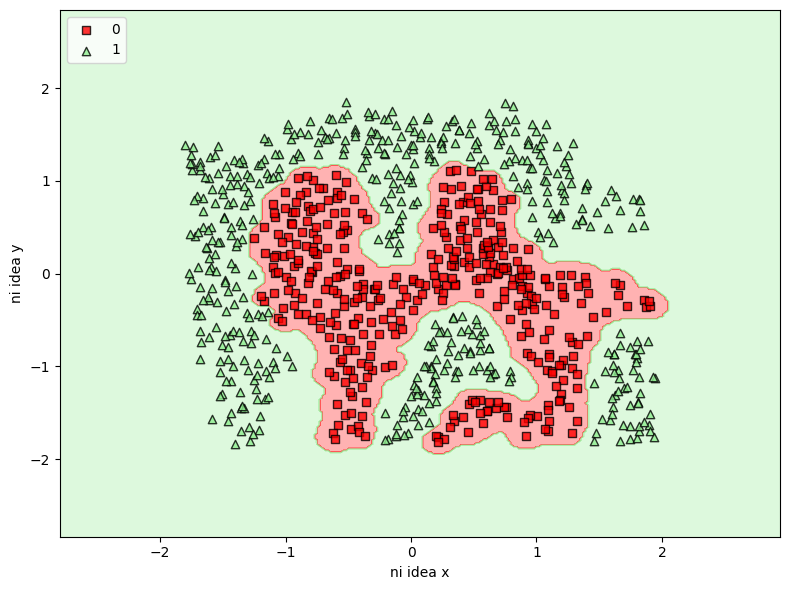

In [12]:
#Entrenamos diferentes SVM y visualizamos el resultado con plot_decision_regions
svm1 = SVC(C=1, kernel='rbf',gamma=100)
svm1.fit(X2_std, y_2)

plt.figure(figsize=(8,6))
plot_decision_regions( X2_std, y_2, clasificador=svm1)
plt.xlabel('ni idea x')
plt.ylabel('ni idea y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Dataset Nº 3
El siguiente dataset _data3.mat_ posee datos para entrenamiento (_X_, _y_) y datos de prueba (_X_test_, _y_test_)

In [13]:
# Dataset data2.mat
archivo_mat_3 = sio.loadmat('1_datos/data3.mat')
X_3 = archivo_mat_3['X']
y_3 = archivo_mat_3['y'].flatten()
X_test_3 = archivo_mat_3['Xval']
y_test_3 = archivo_mat_3['yval'].flatten()
print(X_3.shape)
print(X_test_3.shape)

(211, 2)
(200, 2)


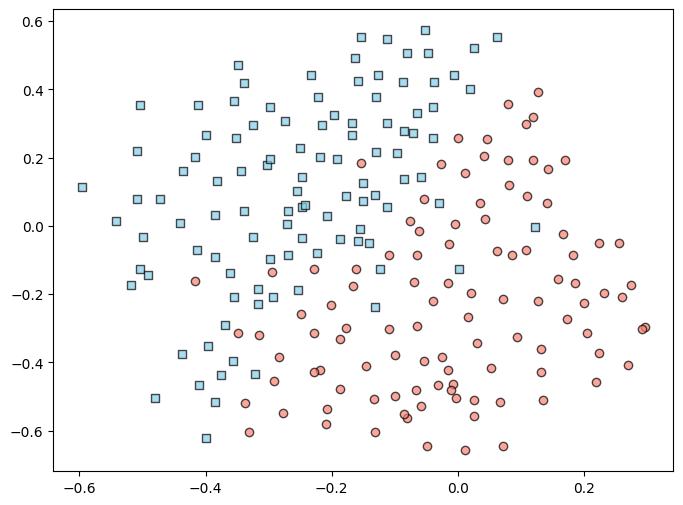

In [14]:
# Visualizamos los datos de entrenamiento
markers = ('o' ,'s', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y_3)):
    plt.scatter(x=X_3[y_3 == cl, 0],
                y=X_3[y_3 == cl, 1],
                alpha=0.7,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

Este conjunto de datos no es linealmente separable. Una forma de obtener los mejores parámetros de una SVM para resolver este problema, es hacer una búsqueda en cuadrícula (GridSearch). Implemente un algoritmo que evalue SVMs con diferentes parámetros mediante validación cruzada (utilice la función [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) con 5 particiones). Obtenga la combinación de valores de C y gamma que resulte en un mejor desempeño de la SVM.

In [15]:
sc = StandardScaler()
sc.fit(X_3)
X_3_std = sc.transform(X_3)
X_test_3_std = sc.transform(X_test_3)
X_3_std.shape

(211, 2)

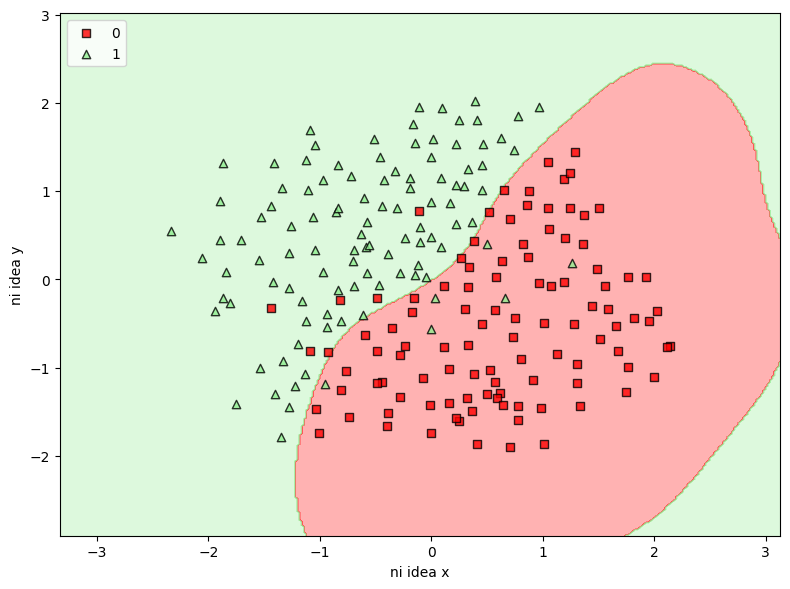

el valor de C es: 10
el valor de gamma es: 1


In [16]:
from sklearn.model_selection import cross_val_score

valores_C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
valores_gamma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 300]

#------------------------------------

from operator import itemgetter
from statistics import mean

error_medio = []
for c in valores_C:
    for g in valores_gamma:
        svm = SVC(C=c, kernel='rbf',gamma=g)
        
        valores=cross_val_score(svm,X_3_std,y_3,cv=5)
        
        error_medio.append([mean(valores),c,g])

error_medio.sort(key=itemgetter(0),reverse=True)


svm1 = SVC(C=error_medio[0][1], kernel='rbf',gamma=error_medio[0][2])
svm1.fit(X_3_std, y_3)


plt.figure(figsize=(8,6))
plot_decision_regions( X_3_std, y_3, clasificador=svm1)
plt.xlabel('ni idea x')
plt.ylabel('ni idea y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print("el valor de C es:",error_medio[0][1])
print("el valor de gamma es:",error_medio[0][2])
#guardo una lista con el valor de la media del error con el crossvalscore y con su valor de gamma y c



## Grid search usando sklearn

Repita el proceso anterior usando [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) de scikit-learn y compare los resultados obtenidos de C y gamma.

In [17]:
from sklearn.model_selection import GridSearchCV

#-----------------------------------------

valores_C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
valores_gamma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 300]
parametros = {'C':valores_C,'gamma':valores_gamma}
svm=SVC(kernel='rbf')
clf = GridSearchCV(svm,parametros)
clf.fit(X_3_std,y_3)
clf.best_estimator_

SVC(C=10, gamma=1)

Con los valores de C y gamma obtenidos, entrene una SVM, grafique la frontera de decisión con `plot_decision_regions` mostrando los datos de entrenamiento y prueba y evalúe el desempeño obtenido con los datos de prueba.

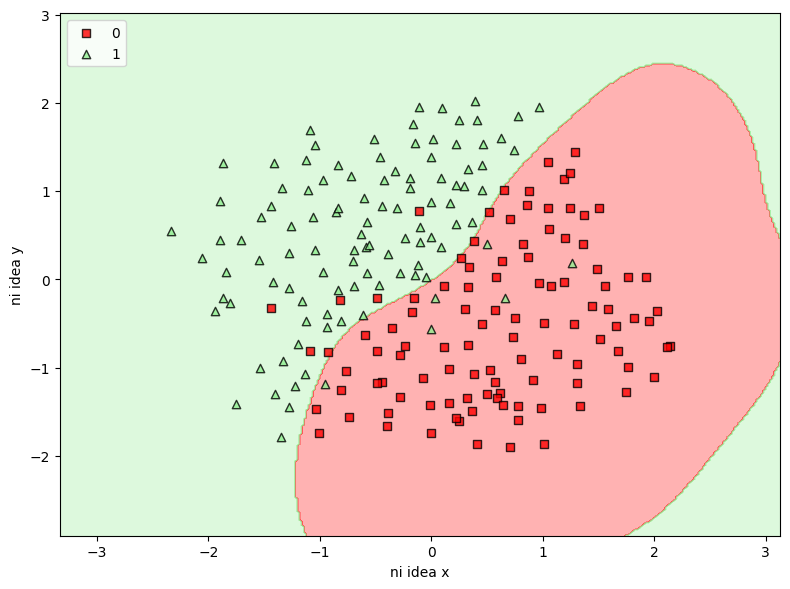

In [18]:
#Entrenamiento
vm1 = SVC(C=10, kernel='rbf',gamma=1)
svm1.fit(X_3_std, y_3)


plt.figure(figsize=(8,6))
plot_decision_regions( X_3_std, y_3, clasificador=svm1)
plt.xlabel('ni idea x')
plt.ylabel('ni idea y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
#Evalúo desempeño
from sklearn.metrics import accuracy_score

y_pred = svm1.predict(X_test_3_std)
#tasa_acierto = (y_pred== y_test_3).sum()/len(y_test_3)

tasa2 = accuracy_score(y_pred,y_test_3)
tasa2

0.95

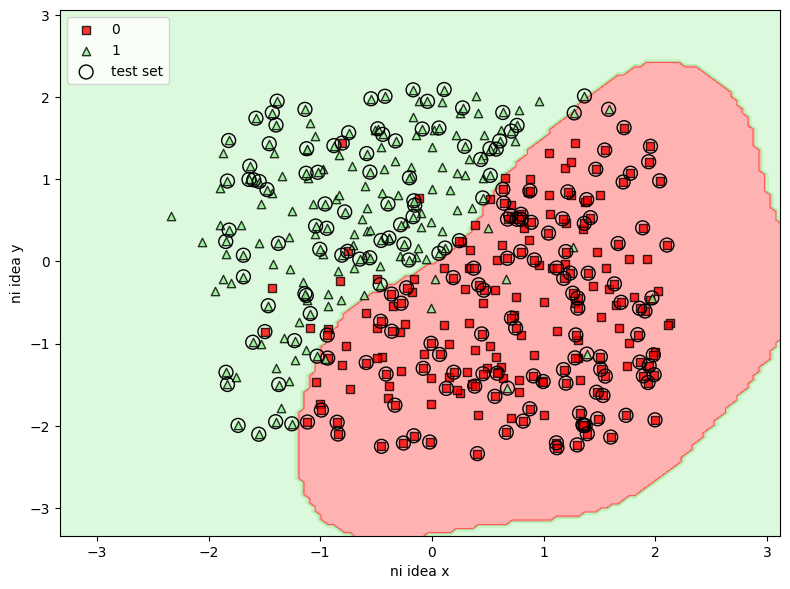

In [24]:
#Grafico la frontera de decisión, muestro los datos de entrenamiento y prueba
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions

X_combined_std = np.vstack((X_3_std, X_test_3_std))
y_combined = np.hstack((y_3, y_test_3))
plt.figure(figsize=(8,6))
plot_decision_regions( X=X_combined_std, y=y_combined, clasificador=svm1, test_idx=range(211, 411), resolution=0.05)
plt.xlabel('ni idea x')
plt.ylabel('ni idea y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()